In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
np.__version__

'1.16.4'

# Pobieranie danych

pobranie na dwa sposoby:
* przez url
* zuploadować plik do środowiska

In [9]:
df = pd.read_csv('https://raw.githubusercontent.com/RostekA/stacjait-ml/master/titanic.csv')

URLError: <urlopen error [Errno 11001] getaddrinfo failed>

In [ ]:
df = pd.read_csv('titanic.csv')

* Sprawdź 5 górnych wierszy tabeli, żeby mieć pojęcie, co w tej tabeli jest.
* Jaki jest kształt?
* Ile tabela ma kolumn i rowków?




In [10]:
df.head(10)

NameError: name 'df' is not defined

In [11]:
df.tail(2)

NameError: name 'df' is not defined

In [12]:
# Ile tabela ma kolumn i wierszy?
df.shape

NameError: name 'df' is not defined

In [13]:
# Jakie są kolumny?
df.columns

NameError: name 'df' is not defined

In [14]:
df.duplicated()

NameError: name 'df' is not defined

In [15]:
# czy są zduplikowane wartości?
df[df.duplicated()]

NameError: name 'df' is not defined

### Ćwiczenie 1

---



1. Pokazać 8 górnych wierszy
2. Pokazać 5 górnych wierszy z 10 dolnych

# Analiza eksploracyjna

In [16]:
# typy danych w kolumnach
df.info()

NameError: name 'df' is not defined

In [17]:
# Jakie są podstawowe metryki statystyczne poszczególnych kolumn?
df.describe()

NameError: name 'df' is not defined

In [18]:
numeric_columns = df.select_dtypes(include=np.number).columns
numeric_columns

NameError: name 'df' is not defined

In [19]:
non_numeric_columns = df.select_dtypes(exclude=np.number).columns
non_numeric_columns

NameError: name 'df' is not defined

In [20]:
for column in numeric_columns:
  print(f'Column: {column}')
  print(f'Unique values: {len(df[column].unique())}')
  df[column].plot.hist(bins=20)
  plt.show()

NameError: name 'numeric_columns' is not defined

In [21]:
# rozkład dla danych kategorycznych
df['sex'].value_counts().plot.bar()
plt.show()

NameError: name 'df' is not defined

### Ćwiczenie 2

1. Ile jest kolumn numerycznych?
2. Ile jest wartości unikalnych w kolumnach 'embarked' 'name'?
3. Jaki jest rozkład danych w kolumnie 'Age' (kolumna numeryczna)?
4. Jaki jest rozkład danych w kolumnie 'embarked' (kolumna nienumeryczna)?
5. *** Dla wszystkich kolumn nienumerycznych pokazać informację: nazwa kolumny, ilość unikalnych wartości oraz narysować rozkład danych.





In [22]:
for column in non_numeric_columns:
  print(f'Column: {column}')
  print(f'Unique values: {len(df[column].unique())}')
  df[column].value_counts().plot.bar()
  plt.show()


NameError: name 'non_numeric_columns' is not defined

## Pytania merytoryczne
Odpowiedź na te pytania przybliży nam rozumienie sytuacji oraz przyda się na etapie "Feature Selection" - które kolumny warto włączyć do zbioru trenującego.

In [29]:
df.head(3)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [30]:
# Jaki procent pasażerów przeżył?
df['survived'].mean()

0.3819709702062643

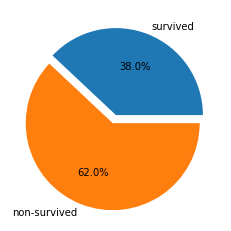

In [38]:
plt.pie([0.38, 0.62], explode=(0, 0.1),  labels=['survived', 'non-survived'],  autopct='%1.1f%%')
plt.show()

In [39]:
# Czy ma płeć wpływ na wskaźnik przeżycia?
df.groupby('sex')['survived'].mean()

sex
female    0.727468
male      0.190985
Name: survived, dtype: float64

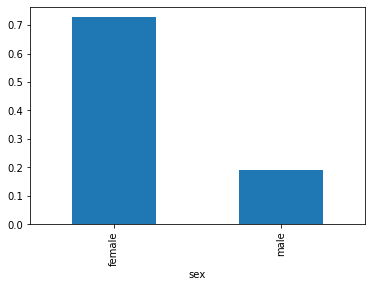

In [40]:
df.groupby('sex')['survived'].mean().plot.bar()
plt.show()

In [41]:
# Czy klasa podróży definiuje szansę na przeżycie?
df.groupby('pclass')['survived'].mean()

pclass
1    0.619195
2    0.429603
3    0.255289
Name: survived, dtype: float64

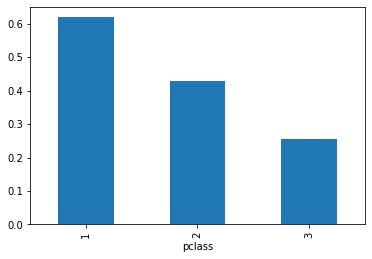

In [42]:
df.groupby('pclass')['survived'].mean().plot.bar()


In [43]:
# Czy młodsi mają więcej szans, niż starsi?
df['survived'].corr(df['age'])

-0.055512520192146246

In [46]:
# Czy dzieci mają więcej szans, niż dorośli?

df[df['age']<15]['survived'].mean()

0.5596330275229358

In [47]:
df[df['age']>=15]['survived'].mean()

0.39060832443970117

### Ćwiczenie 3

1. Czy ma wpływ miasto, z którego odpływają pasażerowie, na stopień przeżycia? Policzyć średnią wartość dla każdego miasta i zbudować odpowiedni wykres.
2. Jaki jest współczynnik korelacji pomiędzy stopniem przeżycia a ceną biletu?
3. *** Czy samotnie podróżujący mieli więcej szans, niż pasażerowie z rodzinami?


In [59]:
condition = ((df['sibsp']>0) | (df['parch']>0))
df[condition]['survived'].mean()

0.5028901734104047

## Wartości brakujące

In [60]:
# Czy są wartości brakujące? Ile?
df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [61]:
s = df.isnull().sum() / len(df) * 100
s

pclass        0.000000
survived      0.000000
name          0.000000
sex           0.000000
age          20.091673
sibsp         0.000000
parch         0.000000
ticket        0.000000
fare          0.076394
cabin        77.463713
embarked      0.152788
boat         62.872422
body         90.756303
home.dest    43.086325
dtype: float64

In [64]:
s[s>25].index.tolist()

['cabin', 'boat', 'body', 'home.dest']

In [0]:
# removing columns
columns_to_remove = ['cabin', 'boat', 'home.dest', 'body']
df_no_missing_columns = df.drop(columns_to_remove, axis=1)

In [65]:
df_no_missing_columns.head(2)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S


In [66]:
df_no_missing_columns.isna().sum()

pclass        0
survived      0
name          0
sex           0
age         263
sibsp         0
parch         0
ticket        0
fare          1
embarked      2
dtype: int64

3 kolumny z wartościami brakującymi:
* embarked
* age
* fare

### Kolumna 'Embarked'

In [67]:
df_no_missing_columns['embarked'].unique()

array(['S', 'C', nan, 'Q'], dtype=object)

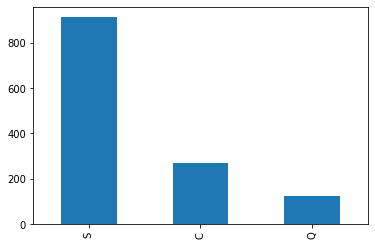

In [72]:
df_no_missing_columns['embarked'].value_counts().plot.bar()

In [71]:
value_to_fill = df_no_missing_columns['embarked'].mode()[0]
value_to_fill

'S'

In [0]:
df_no_missing_columns['embarked'] = df_no_missing_columns['embarked'].fillna(value_to_fill)


In [75]:
df_no_missing_columns['embarked'].isnull().sum()

0

### Kolumna 'Age'

In [76]:
# filling missing values in age column
df_no_missing_columns['age'].isna().sum()

263

#### 2 opcje uzupełnienia wartości brakujących
* średnią wartością wieku
* średnią wartością wieku w zależności od płci


In [77]:
# age average
mean_age = df_no_missing_columns['age'].mean()
mean_age = np.round(mean_age, 1)
mean_age

29.9

In [78]:
# number of missing values by category
df_no_missing_columns[df_no_missing_columns['age'].isnull()].groupby('sex').count()

,pclass,survived,name,age,sibsp,parch,ticket,fare,embarked
sex,,,,,,,,,
female,78,78,78,0,78,78,78,78,78
male,185,185,185,0,185,185,185,185,185


In [79]:
df_no_missing_columns.groupby('sex').mean()['age']

sex
female    28.687071
male      30.585233
Name: age, dtype: float64

In [0]:
df_no_missing_columns['age'] = df_no_missing_columns['age'].fillna(mean_age)

In [81]:
df_no_missing_columns.isnull().sum()

pclass      0
survived    0
name        0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        1
embarked    0
dtype: int64

In [0]:
female_age = 28.7
male_age = 30.5
male_row_index = (df_no_missing_columns['age'].isnull()) & (df_no_missing_columns['sex']=='male')
female_row_index = (df_no_missing_columns['age'].isnull()) & (df_no_missing_columns['sex']=='female')

df_no_missing_columns.loc[male_row_index, 'age'] = male_age
df_no_missing_columns.loc[female_row_index, 'age'] = female_age

In [0]:
# usunąć rowek z dataset jeśli kolumna 'fare' zawiera null

df_no_missing_columns.dropna(subset=['fare'], inplace=True)

In [0]:
df_no_missing_columns.to_csv('no_missing_values.csv', index=False)

In [88]:
df_outliers = pd.read_csv('no_missing_values.csv')
df_outliers.head(1)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,24160,211.3375,S


### Ćwiczenie 5 - Kolumna 'Fare'

1. Ile jest wartości brakujących w kolumnie?
2. Uzupełnić wartości brakujące w kolumnie wartością średnią lub medialną.
3. Sprawdzić, że nie zostało wartości brakujących w tej kolumnie.

In [85]:
df_no_missing_columns['fare'].median()

14.4542

## Outliers


In [89]:
# kolumny numeryczne
numeric_columns = df_outliers.select_dtypes(include=np.number).columns
numeric_df = df_outliers[numeric_columns]
numeric_df.head()

,pclass,survived,age,sibsp,parch,fare
0,1,1,29.0000,0,0,211.3375
1,1,1,0.9167,1,2,151.5500
2,1,0,2.0000,1,2,151.5500
3,1,0,30.0000,1,2,151.5500
4,1,0,25.0000,1,2,151.5500


pclass


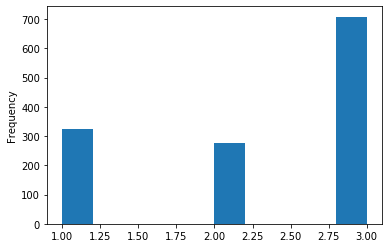

survived


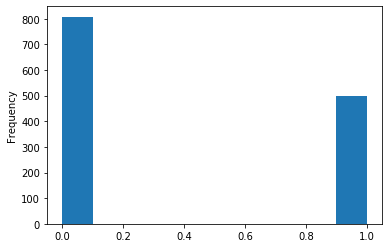

age


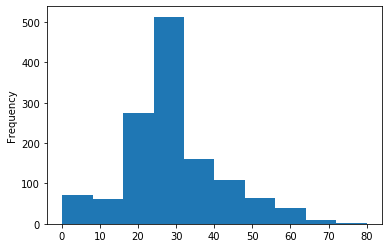

sibsp


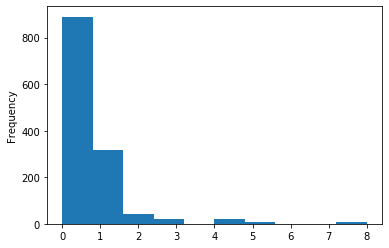

parch


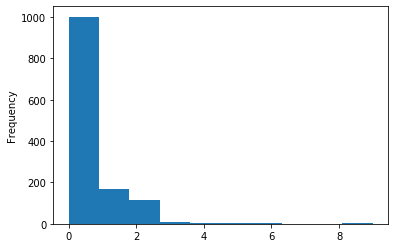

fare


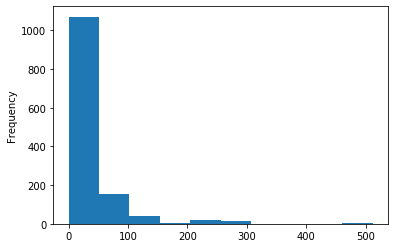

In [90]:
# wizualizacja rozkładu danych poszczególnych kolumn
for column in numeric_df:
  print(column)
  numeric_df[column].plot.hist()
  plt.show()


In [91]:
# outliers for "age" column
age = numeric_df['age']
iqr = np.nanpercentile(age, 75) - np.nanpercentile(age, 25)
lower, upper = (np.nanpercentile(age, 25) - 1.5*iqr), (np.nanpercentile(age, 75) + 1.5*iqr) 
lower, upper


(2.5, 54.5)

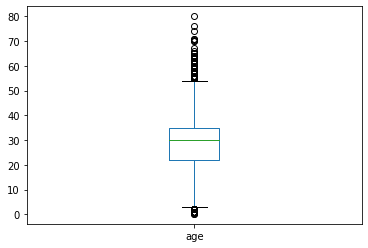

In [92]:
numeric_df.age.plot.box()

Column: pclass
Limits: 0.5, 4.5


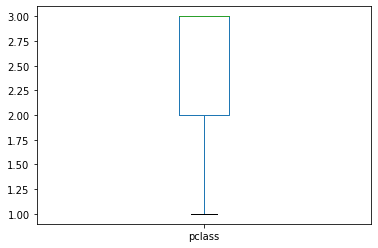

Column: survived
Limits: -1.5, 2.5


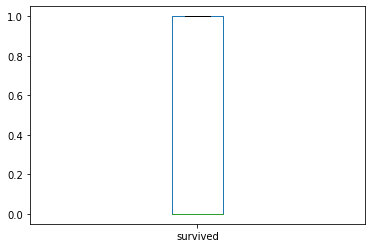

Column: age
Limits: 2.5, 54.5


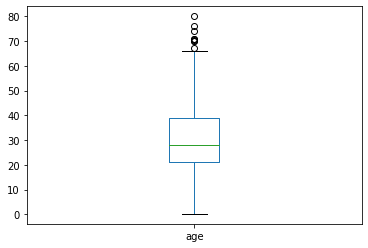

Column: sibsp
Limits: -1.5, 2.5


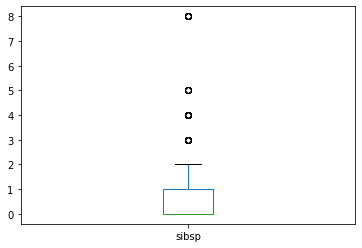

Column: parch
Limits: 0.0, 0.0


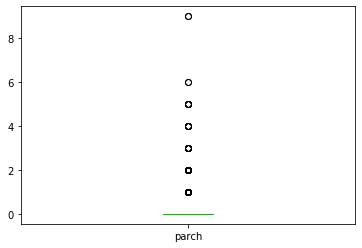

Column: fare
Limits: -27.172999999999995, 66.34379999999999


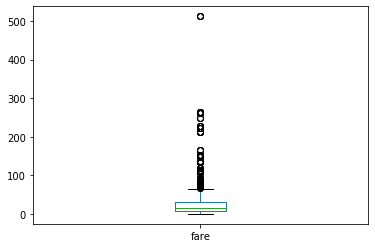

In [93]:
# outliers for all numeric columns
for column in numeric_columns:
  print(f'Column: {column}')
  x = numeric_df[column]
  iqr = np.nanpercentile(x, 75) - np.nanpercentile(x, 25)
  lower, upper = (np.nanpercentile(x, 25) - 1.5*iqr), (np.nanpercentile(x, 75) + 1.5*iqr) 
  print(f'Limits: {lower}, {upper}')
  df[column].plot.box()
  plt.show()
  


#### Kolumna 'Fare'

Przyjmujemy, że wartości ponad 300 USD są niewiarygodne.
Jeśli są większe, to obniżamy je do 300 USD.

1


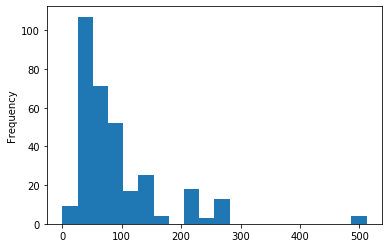

2


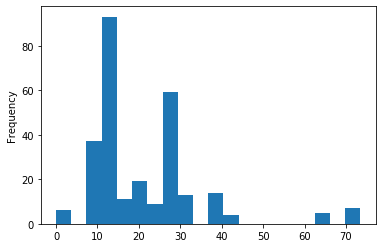

3


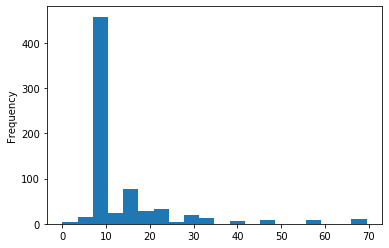

In [96]:
# handling fare outliers
# jeśli cena ponad 300 USD przyjmujemy maksymalną wartość 300
for c in [1,2,3]:
  print(c)
  df_outliers[df_outliers['pclass']==c]['fare'].plot.hist(bins=20)
  plt.show()

In [97]:
df_outliers[df_outliers['fare']>300]['fare']

49     512.3292
50     512.3292
183    512.3292
302    512.3292
Name: fare, dtype: float64

In [0]:
df_outliers.loc[df_outliers['fare']>300, 'fare'] = 300

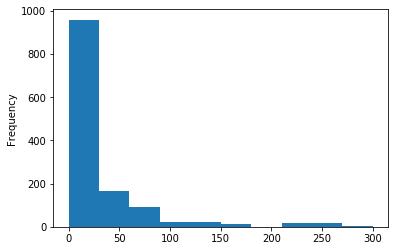

In [99]:
df_outliers['fare'].plot.hist()

#### Kolumna 'Parch'
Zakładamy, że 1% górcych wartości są outliers. Obniżamy je do lokalnych maksimów - percentyl 99%.

In [100]:
parch = df_outliers['parch'].values
np.nanpercentile(parch, 95)

2.0

In [0]:
df_outliers['parch'].plot.hist()

In [0]:
from scipy.stats.mstats import winsorize
df_outliers['parch'] = winsorize(df_outliers['parch'], (0, 0.01))

In [0]:
df_outliers['parch'].plot.hist()

* Age - wiek:

górna granica 66 lat, jednak wiek do 80 lat włącznie jest dopuszczlany. zakładamy, że wartości odbiegające są zgodne z rzeczywistością.
* Sibsp - rodzeństwo + małżonek:

góna granica 2.5, jednak w tamtych czasach posiadanie dużo dzieci było normalne. więc, posiadania 8 rodzeństwa też można traktować jako wartości rzeczywiste.
* Parch - rodzice + dzieci:

najczęściej spotykaną wartością jest 0. czyli większość podróżowała samotnie. Nie mniej jednak, biorąc pod uwagę opisane wyżej, możemy założyć, że ilość dzieci do 9 było rzeczywiste, zwłaszcza biorąc pod uwagę poprzednią kolumnę - _Parch_

* Fare - cena biletu

górna granica 66 dolarów. Z rozkładu widać, że najwięcej biletów było w cenie do 50 dolarów. Możemy założyć jednak, że były pojedyncze pokoje dla VIP gości, które kosztowały bardzo drogo. Żeby zmniejszyć skale nierówności, możemy docelowo podzielić wszystkie ceny na klasy cenowe, przykładowo: 0-50, 50-100, ponad 100.
Dane zagadnienie będzie zaadresowane w sekcji Feature Engineering.


### Podejrzane wartości w kolumnie 'Age' (mniejsze niż 1)

In [101]:
# analiza podejrzanych wartości wieku - wartości poniżej 1

len(df_outliers[df_outliers['age']<1])

12

In [102]:
df_outliers[df_outliers['age']<1]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S
359,2,1,"Caldwell, Master. Alden Gates",male,0.8333,0,2,248738,29.0000,S
427,2,1,"Hamalainen, Master. Viljo",male,0.6667,1,1,250649,14.5000,S
548,2,1,"Richards, Master. George Sibley",male,0.8333,1,1,29106,18.7500,S
590,2,1,"West, Miss. Barbara J",female,0.9167,1,2,C.A. 34651,27.7500,S
611,3,1,"Aks, Master. Philip Frank",male,0.8333,0,1,392091,9.3500,S
657,3,1,"Baclini, Miss. Eugenie",female,0.7500,2,1,2666,19.2583,C
658,3,1,"Baclini, Miss. Helene Barbara",female,0.7500,2,1,2666,19.2583,C
747,3,0,"Danbom, Master. Gilbert Sigvard Emanuel",male,0.3333,0,2,347080,14.4000,S
763,3,1,"Dean, Miss. Elizabeth Gladys ""Millvina""",female,0.1667,1,2,C.A. 2315,20.5750,S


In [103]:
# czy mogą te liczby ułamkowe być ilością miesięcy w roku?
df_outliers[df_outliers['age']<1]['age']*12

1       11.0004
359      9.9996
427      8.0004
548      9.9996
590     11.0004
611      9.9996
657      9.0000
658      9.0000
747      3.9996
763      2.0004
1111     9.0000
1239     5.0004
Name: age, dtype: float64

In [105]:
# jeśli założymy, że to miesiące, więc te osoby są dziećmi i powinny być z przynajmniej jednym z rodziców
# parch powinno być 1 lub więcej 
df_outliers[df_outliers['age']<1]['parch']

1       2
359     2
427     1
548     1
590     2
611     1
657     1
658     1
747     2
763     2
1111    1
1239    1
Name: parch, dtype: int64

In [0]:
df_outliers.to_csv('no_outliers.csv', index=False)

### Ćwiczenie 6 

Zakładamy, że wartości w kolumnie 'Age' powyżej progu 66 lat są prawdziwymi outlierami.

Obsłużyć wszystkie wartości w taki sposob, że wszystkie wartości powyżej 66 zamieniamy na 66. 


# Feature Engineering
* Czy osoba podróżowała sama?
* Czy osoba jest dzieckiem?
* Czy osoba ma jakiś tytuł?


#### is alone?

In [108]:
df_fe = pd.read_csv("no_outliers.csv")
df_fe.head(2)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S


In [0]:
# czy osoba podróżowała sama?
df_fe['alone'] = df_fe.apply(lambda x: 1 if x['sibsp']==0 and x['parch']==0 else 0, axis=1)

In [110]:
df_fe.head(8)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,alone
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S,1
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S,0
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S,0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S,0
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S,0
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,S,1
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,S,0
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,S,1


In [111]:
df_fe['alone'].value_counts()

1    789
0    519
Name: alone, dtype: int64

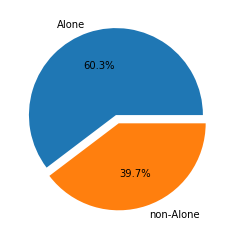

In [112]:
plt.pie([789, 519], explode=(0, 0.1),  labels=['Alone', 'non-Alone'],  autopct='%1.1f%%')
plt.show()

In [115]:
df_fe.groupby('alone')['survived'].mean()

alone
0    0.502890
1    0.302915
Name: survived, dtype: float64

#### title

In [114]:
df_fe.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,alone
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S,1
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S,0
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S,0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S,0
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S,0


In [0]:
# Czy osoba ma jakiś tytuł?

def retrieve_title(s):
  # retrieve what is between , and .
  index_1 = s.find(',')
  index_2 = s.find('.')
  title = s[index_1 + 1: index_2]
  # remove extra spaces
  return title.strip()

In [0]:
df_fe['title'] = df_fe['name'].apply(lambda x: retrieve_title(x))

In [120]:
df_fe.head(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,alone,title
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S,1,Miss
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S,0,Master
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S,0,Miss
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S,0,Mr
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S,0,Mrs
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,S,1,Mr
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,S,0,Miss
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,S,1,Mr
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,S,0,Mrs
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,C,1,Mr


In [121]:

df_fe['title'].value_counts()

Mr              756
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Major             2
Mlle              2
Ms                2
Jonkheer          1
Sir               1
Capt              1
Dona              1
Don               1
the Countess      1
Mme               1
Lady              1
Name: title, dtype: int64

In [0]:
# Rev - reverend: pastor
# Col - colonel: pułkownik
# Mlle - Mademoiselle: odpowiednik do angielskiego Miss, niezamężna kobieta
# Major - army title: major
# Ms - Miss: nie wskazuje stanu cywilnego kobiety
# Mme - Madame: dpowiednik angielskiego Mrs, zamężna kobieta
# Lady - for a girl or woman, used to describe only women of a high social class or status
# Don, Dona - odpowiednik Mr, Mrs, ale z państw łacińskich (Włochy, Hiszpania)
# Capt - tytuł wojskowy.
# Jonkheer - najniższy status szlachecki w Belgii i Holandii
# Sir - nieszlachecki tytuł honorowy.

In [0]:
def group_titles(title):
  noble_titles = ['Master', 'Rev', 'Dr', 'Col', 'Major', 'Capt', 'Jonkheer', 'Sir', 'the Countess', 'Lady']
  females = ['Ms', 'Mlle', 'Mme', 'Dona']
  males = ['Don']
  
  if title in noble_titles:
    return 'Noble'
  elif title in females:
    return 'Mrs'
  elif title in males:
    return 'Mr'
  else:
    return title


In [0]:
df_fe['title'] = df_fe['title'].apply(group_titles)

In [124]:
title_sctructure = df_fe['title'].value_counts()
title_sctructure

Mr       757
Miss     260
Mrs      203
Noble     88
Name: title, dtype: int64

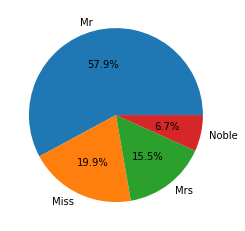

In [125]:
plt.pie(title_sctructure.values,  labels=title_sctructure.index,  autopct='%1.1f%%')
plt.show()

In [126]:
df_fe.groupby('title')['survived'].mean()

title
Miss     0.676923
Mr       0.162483
Mrs      0.788177
Noble    0.465909
Name: survived, dtype: float64

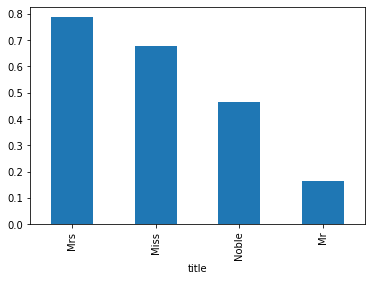

In [127]:
df_fe.groupby('title')['survived'].mean().sort_values(ascending=False).plot.bar()

In [128]:
# final dataset
df_fe.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,alone,title
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S,1,Miss
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S,0,Noble
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S,0,Miss
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S,0,Mr
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S,0,Mrs


### Ćwiczenie 7 - isChild?

Utworzyć nową zmienną binarną, która będzie wskazywać, czy osoba jest dziekiem czy nie?

Proponowany próg wiekowy - 18 lat.

In [0]:
# czy osoba jest dzieckiem?
age_threshold = 18
df_fe['isChild'] = df_fe.apply(lambda x: 1 if x['age']<age_threshold else 0, axis=1)

In [130]:
df_fe.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,alone,title,isChild
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S,1,Miss,0
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S,0,Noble,1
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S,0,Miss,1
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S,0,Mr,0
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S,0,Mrs,0


## Podsumowanie etapu "Feature Engineering"
Zostały stworzone 3 dodatkowe feature'y:
* isAlone - pokazująca czy osoba podróżowała sama;
* title - jaki tytuł miała osoba;
* isChild - czy pasażer to dziecko;

Wykazana została zależność pomiędzy stopniem przeżycia osób a stworzonych feature'ów.



# Feature Selection

Wybieramy kolumny, które stosujemy podczas modelowania.
Są metody eksperckie - wybieramy na podstawie wiedzy domenowej i znajomości tematu.
Są metody oparte na statystyce.

Tutaj skupimy się na wiedzy eksperckiej.


In [131]:
df_fs = df_fe.copy()
df_fs.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'embarked', 'alone', 'title', 'isChild'],
      dtype='object')

In [132]:
df_fs.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,alone,title,isChild
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S,1,Miss,0
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S,0,Noble,1
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S,0,Miss,1
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S,0,Mr,0
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S,0,Mrs,0


In [133]:
len(df_fs['ticket'].unique())

928

In [134]:
df_fs['ticket'].unique()[:20]

array(['24160', '113781', '19952', '13502', '112050', '11769', 'PC 17609',
       'PC 17757', 'PC 17477', '19877', '27042', 'PC 17318', 'PC 17558',
       '11813', '13050', '11751', '111369', 'PC 17483', '13905', '11967'],
      dtype=object)

In [135]:
len(df_fs['name'].unique())

1306

* "Ticket" jest jedynie identyfikatorem biletu. Nie niesie żadnej wartości informacyjnej, która decydowałąby o przeżyciu.
* "Name" jest identyfikatorem osoby. Nie niesie żadnej wartości informacyjnej, która decydowałąby o przeżyciu.

Możemy rozważyć usunięcie kolumn:
1. 'Parch' i 'Sibsp', które zostały wykorzystane do tworzenia 'isAlone'.
2. 'Age' z powodu używania kolumny 'isChild'

Zostawiamy więc wszystkie kulomny oprócz `name` i `ticket`.

In [136]:
columns_to_drop = ['name', 'ticket']
df_fs = df_fs.drop(columns_to_drop, axis=1)
df_fs.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked,alone,title,isChild
0,1,1,female,29.0000,0,0,211.3375,S,1,Miss,0
1,1,1,male,0.9167,1,2,151.5500,S,0,Noble,1
2,1,0,female,2.0000,1,2,151.5500,S,0,Miss,1
3,1,0,male,30.0000,1,2,151.5500,S,0,Mr,0
4,1,0,female,25.0000,1,2,151.5500,S,0,Mrs,0


In [137]:
df_fs.isnull().sum()

pclass      0
survived    0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
alone       0
title       0
isChild     0
dtype: int64

# Data Preparation
* encode categorical variables
* scale data
* dimensionality reduction and visualization


**3 columns to encode**: sex, embark, title.
* Sex - wartość binarna - male lub female => 0/1
* Embark - 3 klasy => one hot encoding
* Title - 4 klasy => one hot encoding

In [138]:
df_dp = df_fs.copy()
df_dp.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked,alone,title,isChild
0,1,1,female,29.0000,0,0,211.3375,S,1,Miss,0
1,1,1,male,0.9167,1,2,151.5500,S,0,Noble,1
2,1,0,female,2.0000,1,2,151.5500,S,0,Miss,1
3,1,0,male,30.0000,1,2,151.5500,S,0,Mr,0
4,1,0,female,25.0000,1,2,151.5500,S,0,Mrs,0


In [139]:
! pip install category_encoders

     |████████████████████████████████| 102kB 3.3MB/s 


## Enkodowanie wartości kategorycznych

In [0]:
import category_encoders as ce

In [141]:
df_dp.head(2)

,pclass,survived,sex,age,sibsp,parch,fare,embarked,alone,title,isChild
0,1,1,female,29.0000,0,0,211.3375,S,1,Miss,0
1,1,1,male,0.9167,1,2,151.5500,S,0,Noble,1


In [142]:
df_dp.sex = df_dp.sex.map({'male': 0, 'female': 1})
df_dp.head(2)

,pclass,survived,sex,age,sibsp,parch,fare,embarked,alone,title,isChild
0,1,1,1,29.0000,0,0,211.3375,S,1,Miss,0
1,1,1,0,0.9167,1,2,151.5500,S,0,Noble,1


In [143]:
# Categorical boolean mask
categorical_feature_mask = df_dp.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = df_dp.columns[categorical_feature_mask].tolist()
categorical_cols

['embarked', 'title']

In [144]:
for column in categorical_cols:
  print(column)
  print(df_dp[column].unique())

embarked
['S' 'C' 'Q']
title
['Miss' 'Noble' 'Mr' 'Mrs']


In [0]:
ce.OneHotEncoder?

In [0]:
ohe = ce.OneHotEncoder(cols=['embarked', 'title'], return_df=True, use_cat_names=True, handle_unknown=0)

In [154]:
df_final = ohe.fit_transform(df_dp)
df_final.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked_S,embarked_C,embarked_Q,alone,title_Miss,title_Noble,title_Mr,title_Mrs,isChild
0,1,1,1,29.0000,0,0,211.3375,1,0,0,1,1,0,0,0,0
1,1,1,0,0.9167,1,2,151.5500,1,0,0,0,0,1,0,0,1
2,1,0,1,2.0000,1,2,151.5500,1,0,0,0,1,0,0,0,1
3,1,0,0,30.0000,1,2,151.5500,1,0,0,0,0,0,1,0,0
4,1,0,1,25.0000,1,2,151.5500,1,0,0,0,0,0,0,1,0


### Ćwiczenie 8 - Enkodowanie 'Title'


## Target and features

In [0]:
# target and features dataset

target = df_final['survived']
features = df_final.drop('survived', axis=1)

In [156]:
features.head()

,pclass,sex,age,sibsp,parch,fare,embarked_S,embarked_C,embarked_Q,alone,title_Miss,title_Noble,title_Mr,title_Mrs,isChild
0,1,1,29.0000,0,0,211.3375,1,0,0,1,1,0,0,0,0
1,1,0,0.9167,1,2,151.5500,1,0,0,0,0,1,0,0,1
2,1,1,2.0000,1,2,151.5500,1,0,0,0,1,0,0,0,1
3,1,0,30.0000,1,2,151.5500,1,0,0,0,0,0,1,0,0
4,1,1,25.0000,1,2,151.5500,1,0,0,0,0,0,0,1,0


In [157]:
features.shape

(1308, 15)

In [158]:
target.head()

0    1
1    1
2    0
3    0
4    0
Name: survived, dtype: int64

## Skalowanie

In [159]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)
features_scaled[:1]

array([[0.        , 1.        , 0.36116884, 0.        , 0.        ,
        0.70445833, 1.        , 0.        , 0.        , 1.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ]])

In [160]:
features_scaled.shape

(1308, 15)

## Dimensionality reduction and visualization


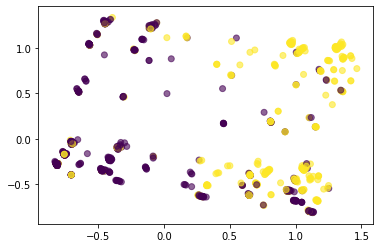

In [161]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(features_scaled)
X = pca.transform(features_scaled)
plt.scatter(X[:, 0], X[:, 1], c=target, alpha=0.6)

# Models Training

## Train / test split

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features_scaled, 
                                                    target, 
                                                    test_size=0.2,
                                                    stratify=target,
                                                    random_state=42)

In [163]:
X_train.shape

(1046, 15)

In [164]:
X_test.shape

(262, 15)

## Cross validation for 4 models


In [0]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

### Logistic Regression

In [0]:
log_reg = LogisticRegression()

In [167]:
cv = StratifiedKFold(n_splits=10)
log_reg_scores = cross_val_score(log_reg, X_train, y_train, cv=cv)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

In [168]:
log_reg_scores

array([0.81904762, 0.79047619, 0.74285714, 0.8       , 0.76190476,
       0.77142857, 0.81730769, 0.80769231, 0.77884615, 0.85576923])

In [169]:
log_reg_mean = np.mean(log_reg_scores)
log_reg_std = np.std(log_reg_scores)
log_reg_summary = f'Logistic Regression: {np.round(log_reg_mean, 3)} +- {np.round(log_reg_std, 3)}'
log_reg_summary

'Logistic Regression: 0.795 +- 0.031'

In [0]:
def get_summary(model, description):
  model_scores = cross_val_score(model, X_train, y_train, cv=cv)
  model_mean = np.mean(model_scores)
  model_std = np.std(model_scores)
  model_summary = f'{description}: {np.round(model_mean, 3)} +- {np.round(model_std, 3)}'
  return model_summary

In [172]:
log_reg_summary = get_summary(log_reg, 'Logistic Regression')

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

In [173]:
print(log_reg_summary)

Logistic Regression: 0.795 +- 0.031


### Ćwiczenie 9

Zrobić kros walidację dla algortymów KNN i SVM. Zrobić wniosek, który  jest dokładniejszy.

### Support Vector Machine

In [174]:
svc = SVC()
svc_summary = get_summary(svc, 'SVC')

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default 

In [175]:
print(svc_summary)

SVC: 0.774 +- 0.034


### K Neighboors

In [0]:
knc= KNeighborsClassifier()
knc_summary = get_summary(knc, 'KNC')

In [0]:
print(knc_summary)

### Decision Tree

In [0]:
dtc = DecisionTreeClassifier()
dtc_summary = get_summary(dtc, 'Decision Tree')

In [0]:
print(dtc_summary)

### Model Selection

In [178]:

summaries = [log_reg_summary, svc_summary, knc_summary]

for summary in summaries:
  print(summary)

Logistic Regression: 0.795 +- 0.031
SVC: 0.774 +- 0.034
KNC: 0.793 +- 0.035


Wybieramy model z największą średnią dokładnością i najmniejszym odchyleniem standardowym (stabilny).

Wybór:
* Logistic Regression (bardziej dokładny) lub
* KNC (dokłądność prawie ta sama, ale bardziej stabilny)

Walidacja może pomóc podjąć decyzję.

In [179]:

log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
y_pred[:10]

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [0]:
y_pred_prob = log_reg.predict_proba(X_test)
y_pred_prob[:10]

In [0]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [181]:
confusion_matrix(y_test, y_pred, labels=[1, 0])

array([[ 77,  23],
       [ 19, 143]])

In [182]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')

Accuracy: 0.8396946564885496
Precision: 0.8020833333333334
Recall: 0.77


In [183]:
# harmonic mean of precision and recall
f1 = 2 * precision * recall / (precision + recall)
f1

0.7857142857142857

In [184]:
# f1 using sklearn function
f1 = f1_score(y_test, y_pred)
f1

0.7857142857142857

### Ćwiczenie 10 - Walidacja KNN

Przeprowadzić walidację modelu KNN. Policzyć accuracy, precision, recall i F1.
Który algorytm jest lepszy - KNN czy Logistic Regression?

In [185]:
knc.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [186]:
y_pred_knc = knc.predict(X_test)
print(accuracy_score(y_test, y_pred_knc))
print(f1_score(y_test, y_pred_knc))

0.8206106870229007
0.763819095477387


# Finalizacja modelu

In [187]:
log_reg_final = LogisticRegression()
log_reg_final.fit(features_scaled, target)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [188]:
from joblib import dump, load
dump(log_reg_final, 'log_reg_model.joblib') 

['log_reg_model.joblib']

In [189]:
model = load('log_reg_model.joblib')
type(model)

sklearn.linear_model.logistic.LogisticRegression

In [190]:
features_scaled.shape

(1308, 15)

To new data all the data transformations to be applied: 
* missing values filling, 
* encoding categorical variables, 
* scaling

Usually this is implemented as **pipelines**.

In [191]:
new_data = features_scaled[1].reshape(1,-1)
new_data

array([[0.        , 0.        , 0.00939458, 0.125     , 0.22222222,
        0.50516667, 1.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 1.        ]])

In [192]:
target[1]

1

In [193]:
model.predict(new_data)

array([1])

In [0]:
new_data

# Feature Importance

In [194]:
!pip install eli5

     |████████████████████████████████| 112kB 4.8MB/s 


In [0]:
features.head()

In [195]:
from eli5.sklearn import PermutationImportance
import eli5
perm = PermutationImportance(log_reg).fit(X_test, y_test)

# show the weights for the permutation importance you just calculated
a = eli5.explain_weights(perm, feature_names = features.columns.tolist())
a

Using TensorFlow backend.


Weight,Feature
0.0756 ± 0.0441,sex
0.0527 ± 0.0177,title_Mr
0.0443 ± 0.0292,pclass
0.0084 ± 0.0325,sibsp
0.0076 ± 0.0048,title_Noble
0.0076 ± 0.0084,title_Miss
0.0069 ± 0.0223,age
0.0061 ± 0.0104,embarked_C
0.0038 ± 0.0181,title_Mrs
0.0031 ± 0.0031,fare
